In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('training.csv',nrows=30000)


In [3]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet','Label']]

In [5]:
X = df.drop(columns=['Label'])
y = df['Label']

y = y.replace('s',0)
y = y.replace('b',1)
X = X.values
y = y.values

In [7]:
!pip install sklearn

You should consider upgrading via the 'c:\users\saurabh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=28c357ca8fadf574699ada765fff5fb676291c289e50fcb3cfd8b05c8c285230
  Stored in directory: c:\users\saurabh\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [12]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [13]:
model = create_baseline()

In [14]:
history = model.fit(X_train,y_train,validation_data =(X_test,y_test), epochs=80)

Epoch 1/80
750/750 [==============================] - 4s 3ms/step - loss: 2.9539 - accuracy: 0.6434 - val_loss: 2.6811 - val_accuracy: 0.5007
Epoch 2/80
750/750 [==============================] - 2s 2ms/step - loss: 1.1370 - accuracy: 0.6672 - val_loss: 0.6614 - val_accuracy: 0.6932
Epoch 3/80
750/750 [==============================] - 2s 2ms/step - loss: 0.7366 - accuracy: 0.6893 - val_loss: 0.6807 - val_accuracy: 0.6868
Epoch 4/80
750/750 [==============================] - 1s 2ms/step - loss: 0.5812 - accuracy: 0.7170 - val_loss: 0.6129 - val_accuracy: 0.6965
Epoch 5/80
750/750 [==============================] - 2s 2ms/step - loss: 0.5423 - accuracy: 0.7316 - val_loss: 0.5015 - val_accuracy: 0.7515
Epoch 6/80
750/750 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7321 - val_loss: 0.5373 - val_accuracy: 0.7087
Epoch 7/80
750/750 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7331 - val_loss: 0.5384 - val_accuracy: 0.7083
Epoch 

In [15]:
tf.keras.models.save_model(model,'Higgs.h5')

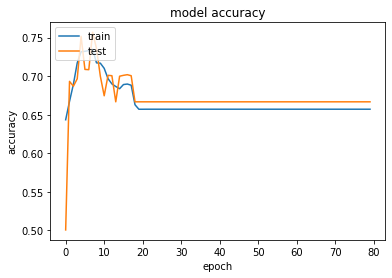

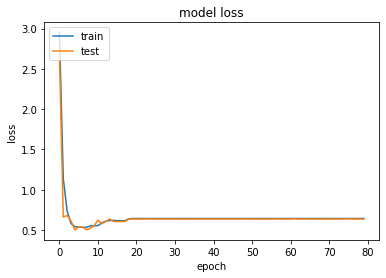

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model1 = tf.keras.models.load_model('Higgs.h5')

In [33]:
model.predict(X_test)

array([[0.6617408],
       [0.6617408],
       [0.6617408],
       ...,
       [0.6617408],
       [0.6617408],
       [0.6617408]], dtype=float32)

In [36]:
def prediction(model,input):
    prediction = model.predict(input)
    return 's' if prediction[0][0] >= 0.5 else 'b'

prediction(model1,np.array([[121.052,   0.185,  79.164, 152.136,   1.571, 125.702,  -0.348]]))


's'

In [ ]:
model = tf.keras.models.load_model('Higgs.h5')
